#
<FONT size="10pt"> <center>Projet 3</center></FONT>. 

**Openclassroom** : https://openclassrooms.com/fr/paths/164/projects/628/assignment

- L'agence **"Santé publique France"** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

**Les données:**

- Le jeu de données Open Food Facts est disponible sur le site officiel.

- Les champs sont séparés en quatre sections :
    - Les informations générales sur la fiche du produit : nom, date de modification, etc.
    - Un ensemble de tags : catégorie du produit, localisation, origine, etc.
    - Les ingrédients composant les produits et leurs additifs éventuels.
    - Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

**Votre mission:**

1) Traiter le jeu de données, en :

    - Réfléchissant à une idée d’application.
    - Repérant des variables pertinentes pour les traitements à venir, et nécessaires pour votre idée d’application.
    - Nettoyant les données en :
        - mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
        - identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.
    - Automatisant ces traitements pour éviter de répéter ces opérations

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

**L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.**

3) Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

4) Justifier votre idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

5) Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.
    - Un notebook du nettoyage des données (non cleané, pour comprendre votre démarche). 
    - Un notebook d’exploration comportant une analyse univariée, multivariée, une réduction dimensionnelle, ainsi que les différentes questions de recherches associées (non cleané, pour comprendre votre démarche).
    - Une présentation, à utiliser en support pour la soutenance, comprenant :
        - La présentation de votre idée d’application.
        - Les opérations de nettoyage effectuées.
        - La description et l'analyse univariée des différentes variables importantes avec les visualisations associées.
        - L’analyse multivariée et les résultats statistiques associés, en lien avec votre idée d’application.
        - 3 observations solidement étayées (graphes et/ou tests statistiques à l’appui au besoin) évaluant la pertinence et la faisabilité de votre application.
        - La synthèse des différentes conclusions sur la faisabilité de votre projet.



# 1 : Librairies et options

In [3]:
import pandas as pd
import numpy as np
from googletrans import Translator
import math
import seaborn as sns
import matplotlib.pyplot as plt
import googletrans
from googletrans import Translator
import colorcet as cc
from tqdm import tqdm
import random
import missingno as msno
import scipy
from sklearn.preprocessing import MinMaxScaler


pd.options.display.max_columns = 200
pd.options.display.max_rows = 1000
pd.set_option('mode.chained_assignment', None) # Pour ne pas avoir de message d'erreur quand on crée nouvelle df à partir d'une autre (app)

# 2 : Ouverture du fichier:

In [4]:
Data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')

C:\Users\Johan\AppData\Local\Temp\ipykernel_15260\152611039.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')


- **Certaines colonnes ont des types mixtes.**

# 3: Infos générales et études des NaNs

## 3.1 : Informations générales 

In [5]:
# Informations générales:
Data.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    code                                        320749 non-null  object 
 1    url                                         320749 non-null  object 
 2    creator                                     320770 non-null  object 
 3    created_t                                   320769 non-null  object 
 4    created_datetime                            320763 non-null  object 
 5    last_modified_t                             320772 non-null  object 
 6    last_modified_datetime                      320772 non-null  object 
 7    product_name                                303010 non-null  object 
 8    generic_name                                52795 non-null   object 
 9    quantity                                    104819 non-nu

- **Il y a 162 colonnes ce qui fait beaucoup a analyser.**
- **Visuellement il y a trés peu colonnes remplies à 100%.**

In [6]:
# Taille du fichier:
Data.shape

(320772, 162)

In [7]:
# Présence de duplicates:
Data.duplicated().sum()

0

- **Il n'y a pas de duplicata dans cette DF.**

## 3.2 : Etude des NaNs

In [8]:
# Etude DF générale : 
print('Il y a', Data.isna().sum().sum(), 'NaNs dans toute la DF.')
print('Il y a', Data.shape[0]*Data.shape[1], 'cases dans la DF.')
print(round((Data.isna().sum().sum())*100/(Data.shape[0]*Data.shape[1])))

Il y a 39608589 NaNs dans toute la DF.
Il y a 51965064 cases dans la DF.
76


- **76% de la DF est vide.**

In [9]:
# création d'une DF de suivi du nettoyage
DfNettoyage = pd.DataFrame(index=range(0, 1))
DfNettoyage['Etapes'] = "Etape 1"
DfNettoyage['Action'] = 'Ouverture du Fichier'
DfNettoyage['NbColonne'] = Data.shape[1]
DfNettoyage['NbLigne'] = Data.shape[0]
DfNettoyage['PourcentageNaN'] = round((Data.isna().sum().sum())*100/(Data.shape[0]*Data.shape[1]))
DfNettoyage

,Etapes,Action,NbColonne,NbLigne,PourcentageNaN
0,Etape 1,Ouverture du Fichier,162,320772,76


In [10]:
# Etude par colonne:
RempCol = (Data.notna().mean()*100).to_frame().sort_values(0).round(4)
print(RempCol.head(30))
round(RempCol).value_counts()

                                            0
melissic-acid_100g                     0.0000
chlorophyl_100g                        0.0000
nervonic-acid_100g                     0.0000
erucic-acid_100g                       0.0000
mead-acid_100g                         0.0000
elaidic-acid_100g                      0.0000
glycemic-index_100g                    0.0000
cerotic-acid_100g                      0.0000
lignoceric-acid_100g                   0.0000
caproic-acid_100g                      0.0000
butyric-acid_100g                      0.0000
nutrition_grade_uk                     0.0000
ingredients_that_may_be_from_palm_oil  0.0000
ingredients_from_palm_oil              0.0000
no_nutriments                          0.0000
water-hardness_100g                    0.0000
caprylic-acid_100g                     0.0003
myristic-acid_100g                     0.0003
palmitic-acid_100g                     0.0003
stearic-acid_100g                      0.0003
montanic-acid_100g                

0.0      69
100.0    13
2.0       7
1.0       7
78.0      5
26.0      5
7.0       4
8.0       4
44.0      3
9.0       3
15.0      3
76.0      3
69.0      3
91.0      2
81.0      2
80.0      2
48.0      2
45.0      2
29.0      2
3.0       2
25.0      2
24.0      2
16.0      2
11.0      2
6.0       2
4.0       2
43.0      1
63.0      1
66.0      1
72.0      1
18.0      1
94.0      1
33.0      1
dtype: int64

- **Il y a 16 colonnes complétement vides dans cette DF.**
- **On observe également un grand nombre de colonne presque vide (69 colonnes).**
- **Seul 13 colonnes sont remplies à 100% ou presque.**
- **Pour l'étude future les colonnes vides devront être suprimées.**

In [11]:
# Etude du remplissage des lignes entiéres:
(Data.isna().mean(axis = 1)*100).round(0).value_counts().to_frame().reset_index().sort_values('index', ascending = False).head(5)

,index,0
46,94.0,5
36,93.0,50
16,92.0,7425
11,91.0,8389
4,90.0,12726


- **Il n'y a pas de lignes à 100% vides dans cette DF.**
- **Il y a 5 lignes à 94% et 50 lignes à 92% de vide.**

In [12]:
# Etude du remplissage des ingrédients : 
Ingredients = Data[['energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g',
 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g',
 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g',
 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g',
 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g',
 'erucic-acid_100g', 'nervonic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g',
 'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g', 'starch_100g', 'polyols_100g', 'fiber_100g',
 'proteins_100g', 'casein_100g', 'serum-proteins_100g', 'nucleotides_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g',
 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g',
 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g',
 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g',
 'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g', 'chromium_100g',
 'molybdenum_100g', 'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g',
 'cocoa_100g', 'chlorophyl_100g', 'carbon-footprint_100g', 'glycemic-index_100g', 'water-hardness_100g']]

print((Ingredients.notna().sum(axis = 1).value_counts().to_frame().reset_index().sort_values('index').head(1)[0][1]/len(Data)*100).round(2))
Ingredients.notna().sum(axis = 1).value_counts().to_frame().reset_index().sort_values('index').head()

17.29


,index,0
1,0,55470
14,1,3366
29,2,338
24,3,562
12,4,3435


- **Il y a 55470 lignes (soit 17% de la DF) sans aucun renseignements sur les ingrédients, elles devront être éliminées.**
- **Il y a 3366 lignes avec 1 seul ingrédient (sucre, sel...).** 

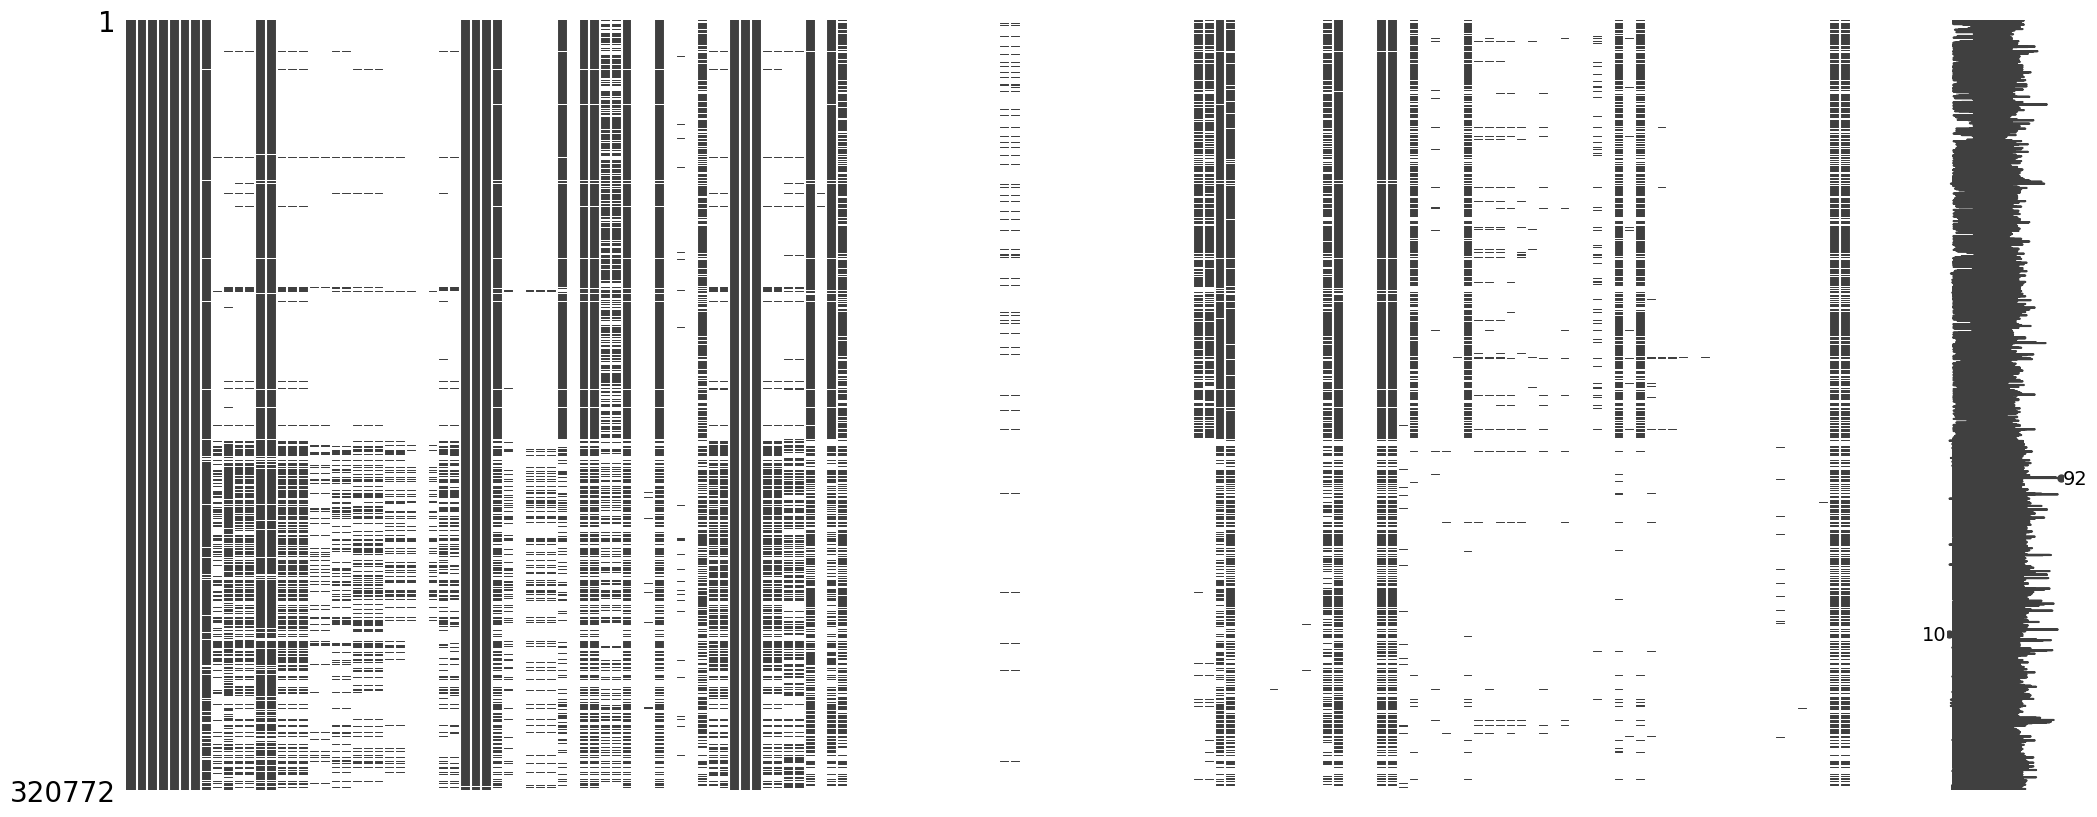

In [13]:
# Visualisation du remplissage avec missingo:
%matplotlib inline
msno.matrix(Data)
plt.show()

- **On voit bien que plusieurs colonnes sont complétement vides.**

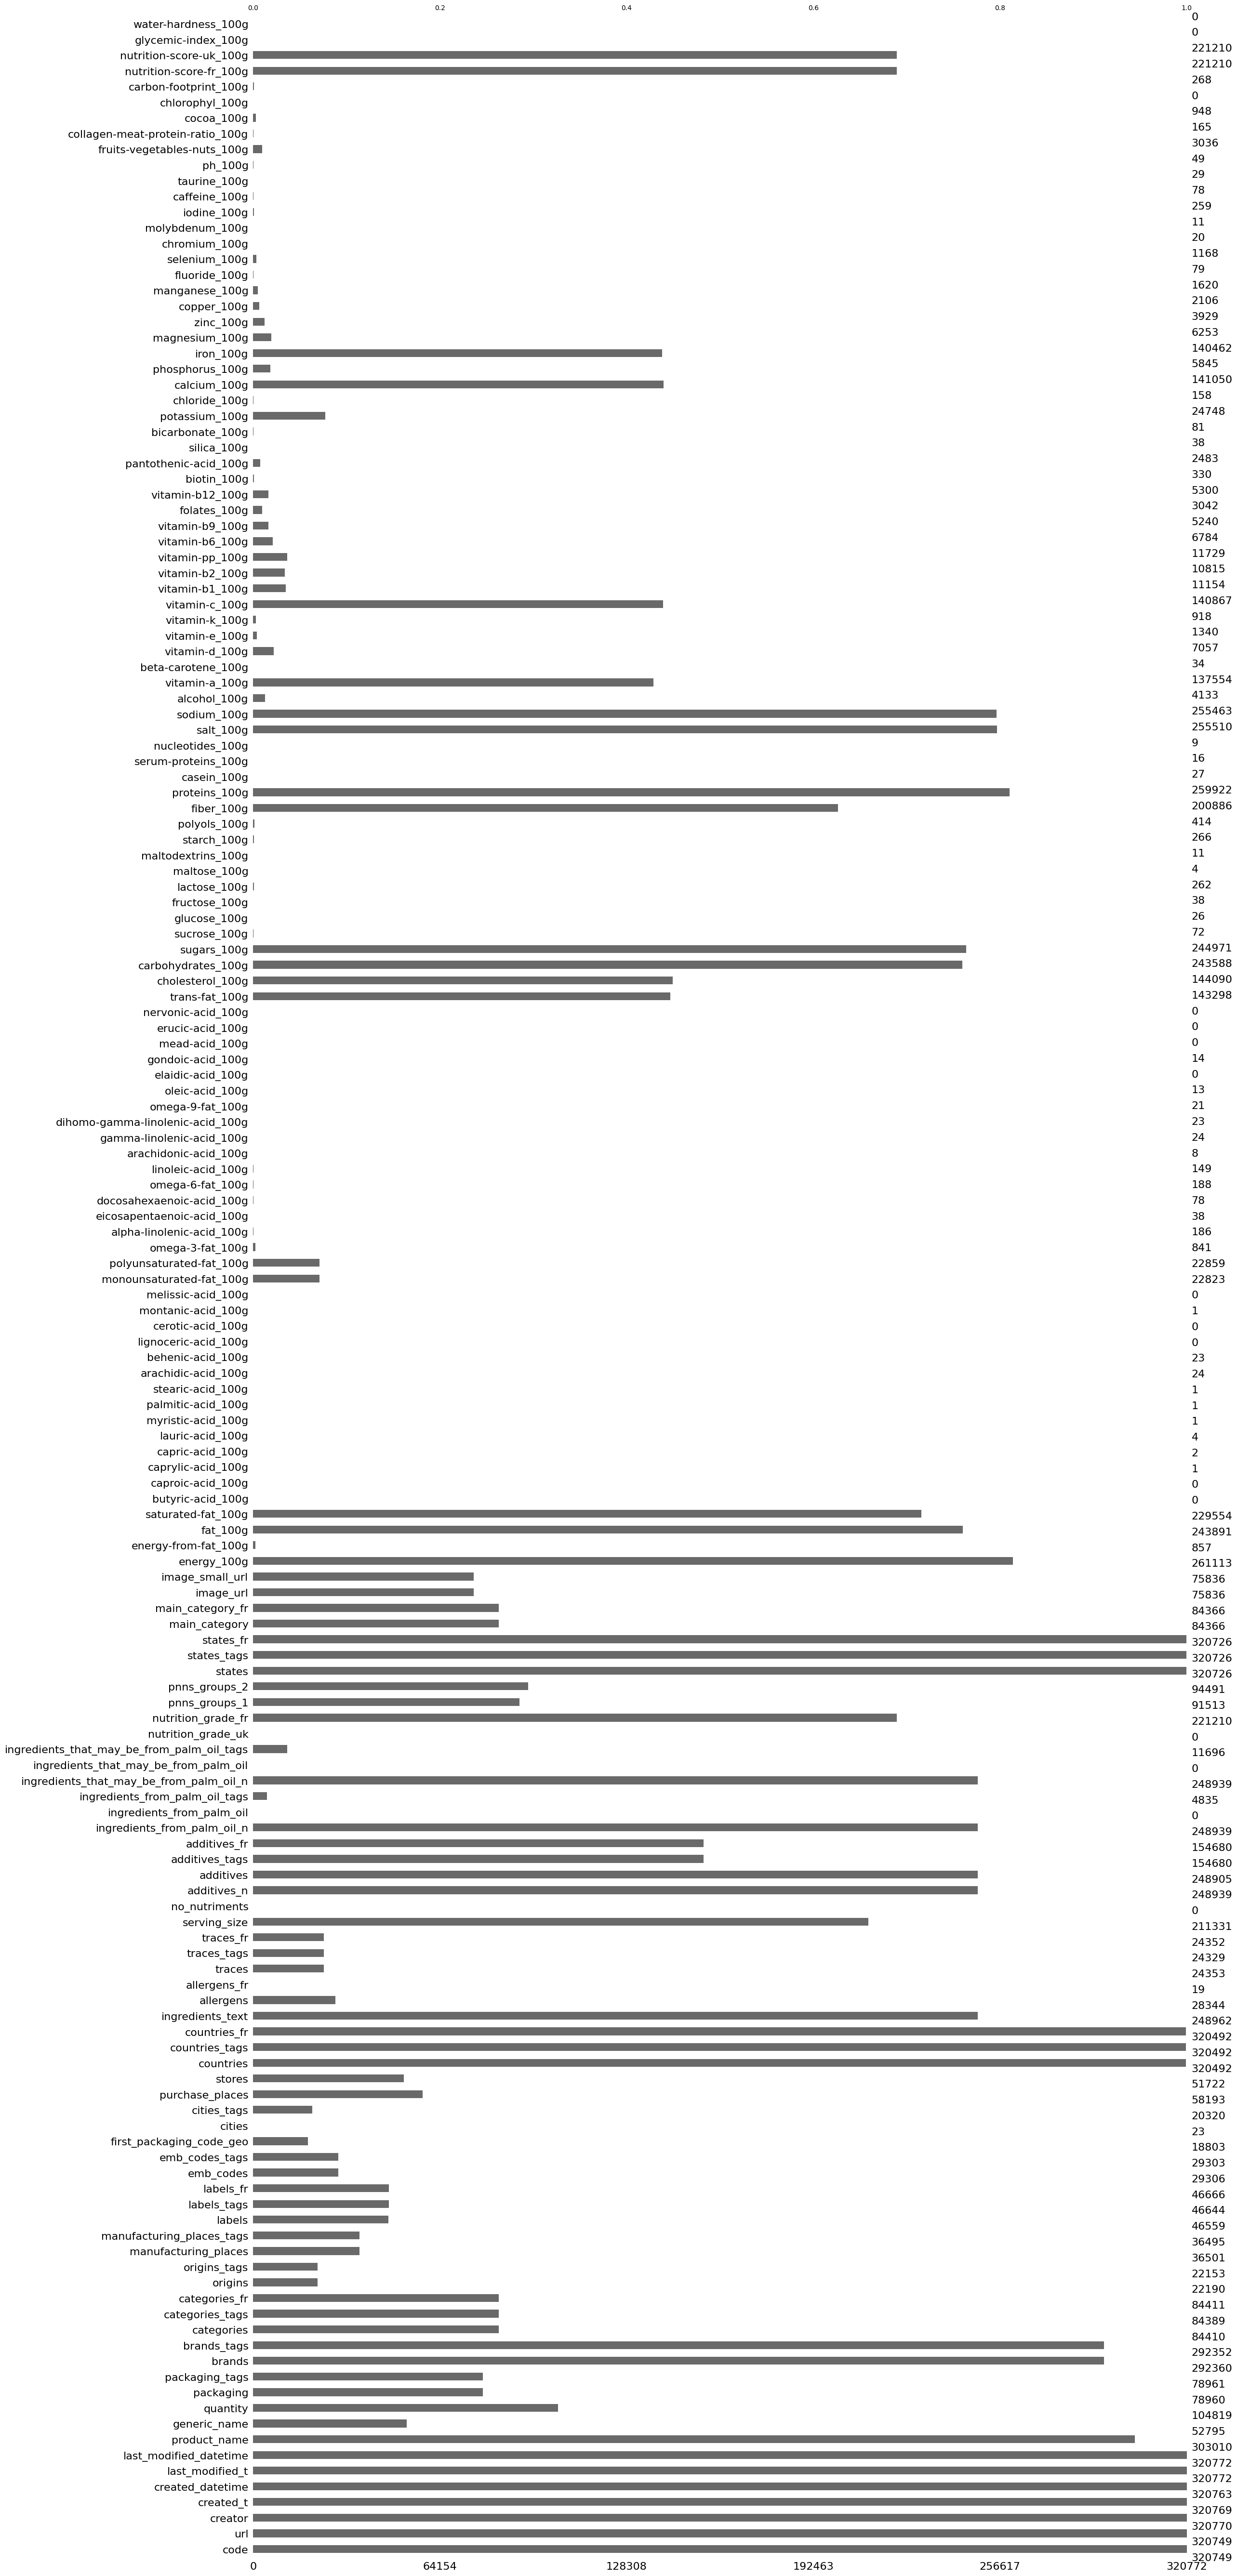

In [14]:
msno.bar(Data)
plt.show()

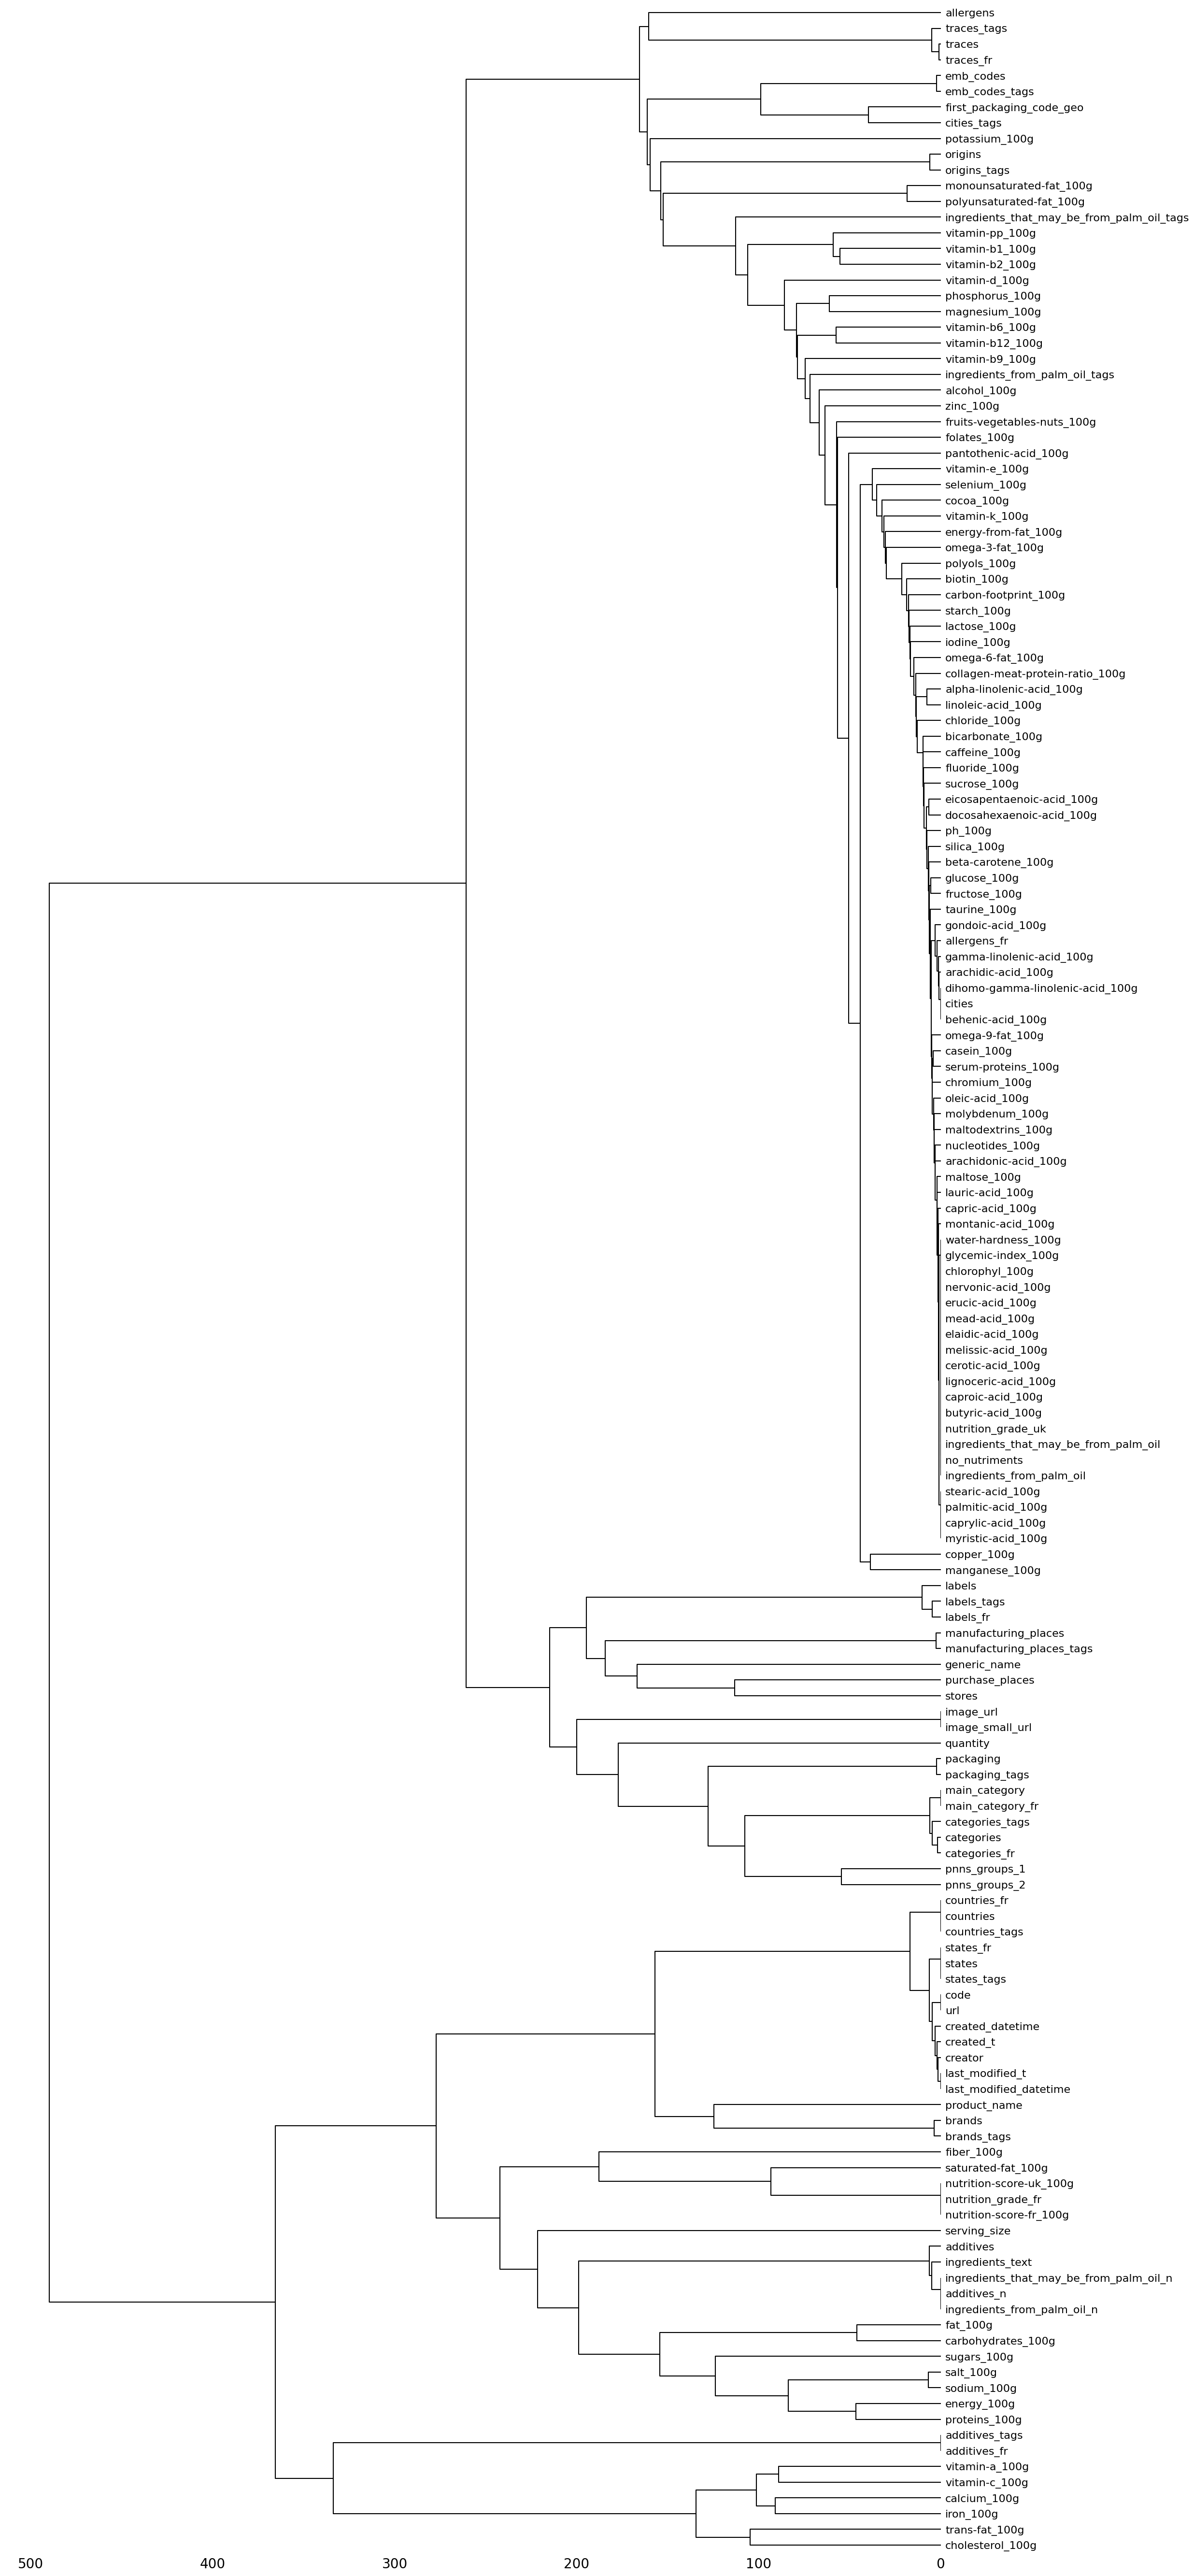

In [15]:
msno.dendrogram(Data)
plt.show()

## 3.3 : Suppression des lignes et des colonnes vides 

In [16]:
# Suppression des colonnes vides :
Data = Data.dropna(axis = 1, how = 'all')

In [17]:
DfNettoyage.columns

Index(['Etapes', 'Action', 'NbColonne', 'NbLigne', 'PourcentageNaN'], dtype='object')

In [18]:
# Ajout de l'étape :
Etape2 = ['Etape 2','Suppression des colonnes vides', Data.shape[1], Data.shape[0], round((Data.isna().sum().sum())*100/(Data.shape[0]*Data.shape[1]))]
Etape2 = pd.DataFrame([Etape2], columns = ['Etapes','Action', 'NbColonne', 'NbLigne', 'PourcentageNaN'])
DfNettoyage = pd.concat([DfNettoyage, Etape2])
DfNettoyage

,Etapes,Action,NbColonne,NbLigne,PourcentageNaN
0,Etape 1,Ouverture du Fichier,162,320772,76
0,Etape 2,Suppression des colonnes vides,146,320772,74


In [19]:
# Suppression des lignes ne contenant pas d'informations sur les ingrédients :
NbIngredients = Ingredients.shape[1]
ProduitsVides = Ingredients.isna().sum(axis = 1).to_frame()
ProduitsVides = ProduitsVides[ProduitsVides[0] == NbIngredients].index

Data = Data.drop(ProduitsVides, axis=0).reset_index(drop = True)

In [20]:
Data.shape

(265302, 146)

- **Il reste donc 146 colonnes et 265302 lignes dans ce DF.**

In [21]:
# Ajout de l'étape
Etape3 = ['Etape 3', 'Suppression des lignes vides', Data.shape[1], Data.shape[0], round((Data.isna().sum().sum())*100/(Data.shape[0]*Data.shape[1]))]
Etape3 = pd.DataFrame([Etape3], columns = ['Etapes','Action', 'NbColonne', 'NbLigne', 'PourcentageNaN'])
DfNettoyage = pd.concat([DfNettoyage, Etape3])

# 4 : Analyse des colonnes restantes, pertinance pour l'application

L'agence **"Santé publique France"** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

- Entreprise Française.
- Application innovante en lien avec l'alimentation.

Le site internet fourni une explication des variable à cette adresse:
- Lien = https://world.openfoodfacts.org/data/data-fields.txt

Aprés une analyse rapide des variables il y a plusieurs variables impliqués dans l'environnement, il peut être intéressant de déterminer si ce que l'on mange a un impact fort ou non sur l'environnement (bien manger c'est bien mais si on protège la nature c'est encore mieux).

## 4.1 : Analyses du contenu des différentes variables par groupe
- Lien = https://world.openfoodfacts.org/data/data-fields.txt
- Suppression des colonnes non pertinantes au fur et à mesure car garder 162 colonnes c'est trop pour l'application et l'analyse.
- Suppression des lignes si les infos manquantes sont trop pertinantes pour l'application et l'analyse.

### 4.1.1 : Informations générales

In [22]:
# Les variables dans cette catégorie sont representées par les 11 premières colonnes :
VariableIG = Data.iloc[:, :10]

In [23]:
# Info générales sur ces variables :
VariableIG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265302 entries, 0 to 265301
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   code                    265279 non-null  object
 1   url                     265279 non-null  object
 2   creator                 265302 non-null  object
 3   created_t               265299 non-null  object
 4   created_datetime        265293 non-null  object
 5   last_modified_t         265302 non-null  object
 6   last_modified_datetime  265302 non-null  object
 7   product_name            261845 non-null  object
 8   generic_name            45297 non-null   object
 9   quantity                72252 non-null   object
dtypes: object(10)
memory usage: 20.2+ MB


In [24]:
# Analyse des produits sans code et sans url:
print(len(VariableIG[VariableIG['code'].isna() & VariableIG['url'].isna()]))
print(VariableIG[VariableIG['code'].isna() & VariableIG['url'].isna()]['creator'].unique())
Data = Data[Data['code'].notna()]

23
['villecomtal-sur-arros-gers-france'
 'villecomtal-sur-arros-gers-france,saint-just-chaleyssin-isere-france']


- **Il y a 23 produits sans code ni url**.
- **Ces 23 produits on tous le même créateur de la ligne dans cette DF.**
- **Hormis ce manque d'information pour ces 23 produits la présence de ces deux colonnes est utile pour accéder à la fiche produit sur le site internet.**
- **Elimination de 23 lignes, l'absence d'url ne facilitant pas la recherche d'informations sur les produits pour le client.**

In [25]:
# Produits en double :
Data['code'].value_counts()

734756002031    2
72220008586     2
639192720092    2
54491472        2
31200029997     2
               ..
76033103667     1
76042120518     1
76042131118     1
76042140356     1
999990026839    1
Name: code, Length: 265192, dtype: int64

- **Il y a des produits en doubles, voir aprés le nettoyage si c'est toujours le cas.**

In [26]:
# Analyse des colonnes Creations:
print(VariableIG['creator'].nunique())
print(VariableIG['created_t'].nunique())
print(VariableIG['created_datetime'].nunique())
print(VariableIG['last_modified_t'].nunique())
print(VariableIG['last_modified_datetime'].nunique())

Data = Data.drop(columns = ['creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime'])

2546
135435
135400
128689
128594


- **Il y a 2546 créateurs différents dans cette DF.**
- **Il y a 135435 dates de création de lignes dans cette DF (UNIX timestamp format).**
- **Il y a 135400 dates de création de lignes dans cette DF (iso8601 format: yyyy-mm-ddThh:mn:ssZ).**
- **Il y a quelques lignes qui ne correspondent pas entre les deux formats de dates.**
- **On observe les mêmes différences entre les colonnes de modifications aux deux formats.**

- **De manière générale ces 5 colonnes ne sont pas utiles pour l'analyse d'un produit et pour la création d'une application, elles sont donc éliminées.**

In [27]:
# Analyse des colonnes produits/noms/quantités :
print(len(VariableIG[VariableIG['product_name'].isna()]))
print(len(VariableIG[VariableIG['generic_name'].isna()]))
print(len(VariableIG[VariableIG['product_name'].isna() & VariableIG['generic_name'].notna()]))
print(len(VariableIG[VariableIG['quantity'].isna()]))

Data = Data.drop(columns = ['generic_name', 'quantity'])
Data = Data[Data['product_name'].notna()]

3457
220005
60
193050


- **Il y a 3457 produits sans nom du produit.**
- **Il y a 220005 produits sans nom générique.**
- **Il y a 60 produits qui n'ont pas de nom de produit mais ont un nom générique.**
- **193050 produits n'ont pas de quantité noté, cette colonne n'impactant pas les quantités nutritives qui sont rapportées à 100g de produit, elle est donc éliminée.**
- **Les lignes sans nom de produits ne sont pas utiles à garder.**

### - **Pour la partie informations générales, les colonnes les plus utiles sont les colonnes : code, url et nom de produit.**

In [28]:
# Ajout de l'étape
Etape4 = ['Etape 4', 'Etude des Variables Info Générales', Data.shape[1], Data.shape[0], round((Data.isna().sum().sum())*100/(Data.shape[0]*Data.shape[1]))]
Etape4 = pd.DataFrame([Etape4], columns = ['Etapes','Action', 'NbColonne', 'NbLigne', 'PourcentageNaN'])
DfNettoyage = pd.concat([DfNettoyage, Etape4])

### 4.1.2 : Tags :

Dans cette colonne il y a des catégories avec des tags, le document en annexe donne cette définition :
- **ex : categories_tags est l'ensemble des balises normalisées de l'ordinateur à partir du champ catégories**

In [29]:
# Les variables dans cette catégorie sont representées par les 24 colonnes suivantes :
VariableTag = Data.iloc[:,3:27]

In [30]:
# Info générale de cette catégorie:
VariableTag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261822 entries, 0 to 265301
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   packaging                  62523 non-null   object
 1   packaging_tags             62523 non-null   object
 2   brands                     258350 non-null  object
 3   brands_tags                258349 non-null  object
 4   categories                 66384 non-null   object
 5   categories_tags            66384 non-null   object
 6   categories_fr              66384 non-null   object
 7   origins                    16688 non-null   object
 8   origins_tags               16668 non-null   object
 9   manufacturing_places       30558 non-null   object
 10  manufacturing_places_tags  30556 non-null   object
 11  labels                     39261 non-null   object
 12  labels_tags                39348 non-null   object
 13  labels_fr                  39348 non-null   

In [31]:
# Etude du packaging:
print(len(list(VariableTag['packaging'].unique())))
print(len(list(VariableTag['packaging_tags'].unique())))
print(round(VariableTag['packaging'].isna().sum()/len(VariableTag)*100))
print(round(VariableTag['packaging_tags'].isna().sum()/len(VariableTag)*100))

print(len(VariableTag[(VariableTag['packaging'].isna()) & (VariableTag['packaging_tags'].notna())]))
list(VariableTag[(VariableTag['packaging'].isna()) & (VariableTag['packaging_tags'].notna())]['packaging_tags'].unique())

del Data['packaging']

12664
10576
76
76
0


- **Il s'agit des types de packaging des différents produits, ces deux colonnes sont vides à 76% dans cette DF.**
- **Avec le même taux de remplissage on remarque qu'il y a 12664 packaging unique dans la colonne sans tag contre 10576 dans la colonne avec tags (la colonne avec tags est bien une colonne normalisée comme indiqué dans les sources.**
- **La colonne packaging est intéressante pour une analyse environnemental du produit, on garde la colonne normalisée.**

In [32]:
# Etude de brands (marques):
print(len(VariableTag["brands"].unique()))
print(len(VariableTag["brands_tags"].unique()))
print(round(VariableTag['brands'].isna().sum()/len(VariableTag)*100))
print(round(VariableTag['brands_tags'].isna().sum()/len(VariableTag)*100))
print(len(VariableTag[(VariableTag['brands'].isna()) & (VariableTag['brands_tags'].notna())]))
list(VariableTag[(VariableTag['brands'].isna()) & (VariableTag['brands_tags'].notna())]['brands_tags'].unique())

del Data['brands']

47865
42247
1
1
2


- **Il y a 47865 parques repertoriées dans la colonne brands contre 42247 pour la colonne brands_tags (données normalisées).**
- **Ces colonnes ont 9% de NaNs.**
- **Pas d'informations supplémentaires entre ces deux colonnes hormis un ramplissage manuel des cases vides par le mot 'na'.**
- **Colonnes trés interessantes pour l'étude future, la colonne avec tags étant la plus pertinante à garder car elle est normalisées.**

In [33]:
# Etude des catégories:
list(VariableTag['categories'].unique())
print(len(VariableTag["categories"].unique()))
print(len(VariableTag["categories_tags"].unique()))
print(len(VariableTag["categories_fr"].unique()))
print(round(VariableTag['categories'].isna().sum()/len(VariableTag)*100))
print(round(VariableTag['categories_tags'].isna().sum()/len(VariableTag)*100))
print(round(VariableTag['categories_fr'].isna().sum()/len(VariableTag)*100))
print(len(VariableTag[(VariableTag['categories'].isna()) & (VariableTag['categories_tags'].notna())]))
list(VariableTag[(VariableTag['categories'].isna()) & (VariableTag['categories_tags'].notna())]['categories_tags'].unique())
print(len(VariableTag[(VariableTag['categories_tags'].isna()) & (VariableTag['categories_fr'].notna())]))
list(VariableTag[(VariableTag['categories_tags'].isna()) & (VariableTag['categories_fr'].notna())]['categories_fr'].unique())

del Data['categories_tags']
del Data['categories']

29978
17340
17340
75
75
75
0
0


- **Pour un même taux de remplissage (25%) sur les 3 colonnes catégories on a plus de lignes pour la variable sans tags.**
- **Pas d'information supplémentaires entre les colonnes categories et categories_tags, par contre 10 catégories en plus dans la colonne fr qui correspondent à des chiffres (mixed types).**
- **Ces colonnes représentent les catégories de produits sous forme de texte, peut utile pour slicer la DF au vu du grand nombre de catégories différentes, je garde toutefois la colonne categories_fr qui peut nous donner des informations supplémentaires.**

In [34]:
# Etude des origines des ingrédients:
list(VariableTag['origins'].unique())
print(len(VariableTag["origins"].unique()))
print(len(VariableTag["origins_tags"].unique()))
print(round(VariableTag['origins'].isna().sum()/len(VariableTag)*100))
print(round(VariableTag['origins_tags'].isna().sum()/len(VariableTag)*100))

del Data['origins']

3860
3483
94
94


- **Origine des ingrédients dans plusieurs langues.**
- **Seul 6% des lignes sont complétées, et comme pour les autres variables le tags est bien une normalization de la colonne non tags.**
- **Colonne intéressante la provenance des ingrédients ayant un impact sur l'environnement.**

In [35]:
# Etude des origines de fabrication:
list(VariableTag['manufacturing_places'].unique())
print(len(VariableTag["manufacturing_places"].unique()))
print(len(VariableTag["manufacturing_places_tags"].unique()))
print(round(VariableTag['manufacturing_places'].isna().sum()/len(VariableTag)*100))
print(round(VariableTag['manufacturing_places_tags'].isna().sum()/len(VariableTag)*100))

del Data['manufacturing_places']

6072
5628
88
88


- **12% de remplissage pour les deux colonnes.**
- **La colonne tags est une normalization de la colonne nontags.**
- **Origines (pays, villes, régions) des ingrédients dans différentes langues.**
- **Colonne intéressante pour l'impact environnemental meme si moindre que l'origine des ingrédients.**

In [36]:
# Etude des colonnes labels:
list(VariableTag['labels'].unique())
print(len(VariableTag['labels'].unique()))
print(len(VariableTag['labels_tags'].unique()))
print(len(VariableTag['labels_fr'].unique()))
print(round(VariableTag['labels'].isna().sum()/len(Data)*100))
print(round(VariableTag['labels_tags'].isna().sum()/len(Data)*100))
print(round(VariableTag['labels_fr'].isna().sum()/len(Data)*100))
list(VariableTag[(VariableTag['labels'].isna()) & (VariableTag['labels_tags'].notna())]['labels_tags'].unique())
list(VariableTag[(VariableTag['labels_tags'].isna()) & (VariableTag['labels_fr'].notna())]['labels_fr'].unique())

del Data['labels']
del Data['labels_tags']

15877
12066
12066
85
85
85


- **Labels des différents produits (bio, sans sucre...).**
- **85% de NaNs dans ces colonnes.**
- **Informations chiffré supplémentaire entre fr et labels.**
- **Utile pour l'étude de l'impact environnemental.**

In [37]:
# Etude des ems:
VariableTag['emb_codes_tags'].unique()

del Data['emb_codes_tags']
del Data['emb_codes']

- **Code d'embalage peu utile pour l'analyse.**

In [38]:
# Analyse des lieux:
list(VariableTag['first_packaging_code_geo'].unique())
print(round(VariableTag['first_packaging_code_geo'].isna().sum()/len(Data)*100))
list(VariableTag['cities'].unique())
list(VariableTag['cities_tags'].unique())
print(round(VariableTag['cities_tags'].isna().sum()/len(Data)*100))

del Data['first_packaging_code_geo']
del Data['cities']
del Data['cities_tags']

94
93


- **Données de longitude latitude du premier emballage vide à 94%.**
- **Noms des villes pour ces mêmes coordonnées de géolocalisation (supposition) vide à 94%.**
- **Pas forcément utilisable.**

In [39]:
# Lieu d'achat et magasin:
list(VariableTag["purchase_places"].unique())
list(VariableTag["stores"].unique())
print(round((VariableTag["purchase_places"].isna().sum())/len(Data)*100))
print(round((VariableTag["stores"].isna().sum())/len(Data)*100))

del Data['purchase_places']
del Data['stores']

82
83


- **Lieu et nom du magasin ou acheter le produit???.**
- **A regarder de plus prés si utile mais on peut normalement acheter des produits à plusieurs endroits.**

In [40]:
# Pays de vente:
list(VariableTag['countries'].unique())
list(VariableTag['countries_tags'].unique())
list(VariableTag['countries_fr'].unique())
print(round((VariableTag["countries"].isna().sum())/len(Data)*100,2))
print(round((VariableTag["countries_tags"].isna().sum())/len(Data)*100,2))
print(round((VariableTag["countries_fr"].isna().sum())/len(Data)*100,2))

del Data['countries']
del Data['countries_tags']

0.03
0.03
0.03


- **La colonne coutries est une liste de pays en toute lettre ou en abrégé et dans différentes langues.**
- **Les colonnes coutries_tags et coutries_fr sont une liste de pays en toute lettre dans différentes langues.**
- **Toutes ces colonnes sont remplies de la même manière et quasiement entiérements pleines**
- **Intéressant pour récupérer que les produits vendus en France.**

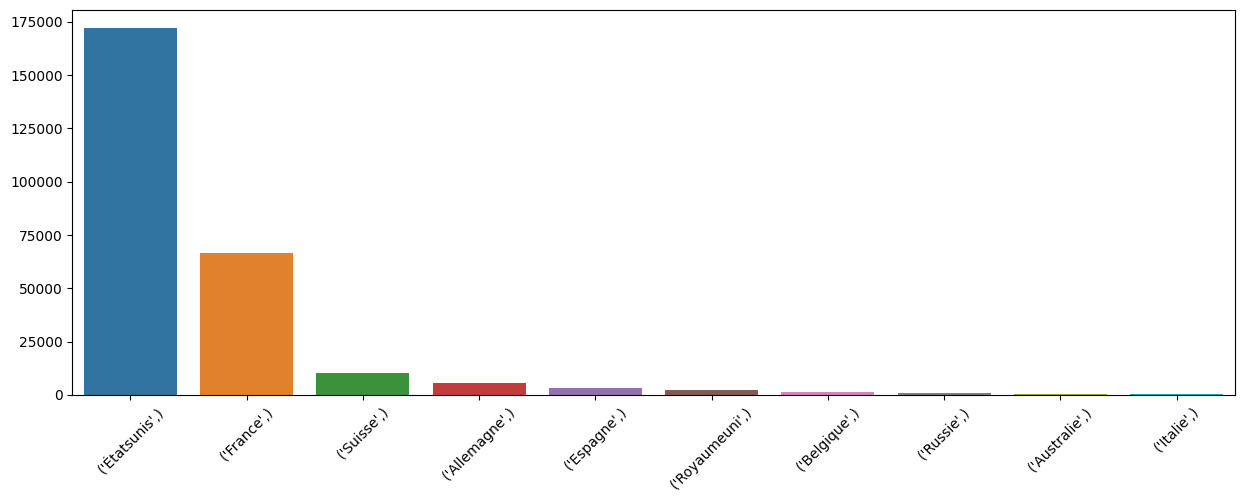

In [41]:
Pays = list(Data['countries_fr'])

ListPays = []
for P in Pays :
    ListPays.append(''.join(str(P).split(',')))


ListPays = [P.replace(' ', '').replace('-', '').replace('Uni', 'uni') for P in ListPays]

ListPays2 = []
import re
for P in ListPays:
    x = re.findall('[A-ZÉÈ][^A-ZÉÈ]*', P)
    for i in x:
        ListPays2.append(i)
        
# On pourrait traduire pour récupérer des informations :

Graph = pd.DataFrame(ListPays2).value_counts().head(10).to_frame().T
plt.subplots(figsize = (15,5))
sns.barplot(Graph)
plt.xticks(rotation = 45)
plt.show()

- **Il y a beaupcoup plus de produits vendus aux USA qu'en France.**
- **On peut supposer que ce ne sont pas les mêmes normes.**
- **Pour l'application il faudra se concentrer sur les produits vendus en France.**

In [42]:
# Y a t'il des colonnes spécifiques USA ou France :
France = Data[(Data['countries_fr'].notna()) & (Data['countries_fr'].str.contains('France|france'))]
USA = Data[(Data['countries_fr'].notna()) & (Data['countries_fr'].str.contains('États-Unis'))]
France = round(France.iloc[:,39:].isna().sum(axis = 0)/len(France)*100).to_frame().rename(columns = {0 : 'France'})
USA = round(USA.iloc[:,39:].isna().sum(axis = 0)/len(USA)*100).to_frame().rename(columns = {0 : 'USA'})
Col = pd.merge(France, USA, left_index = True, right_index = True)

print(len(Col[(Col["France"] == 100) & (Col['USA'] == 100)]))
print(len(Col[(Col["France"] == 100) & (Col['USA'] != 100)]))
print(len(Col[(Col["France"] != 100) & (Col['USA'] == 100)]))
print(Col[(Col["France"] == 100) & (Col['USA'] != 100)])
print(Col[(Col["France"] != 100) & (Col['USA'] == 100)])

46
5
5
                France   USA
folates_100g     100.0  98.0
zinc_100g        100.0  98.0
copper_100g      100.0  99.0
manganese_100g   100.0  99.0
selenium_100g    100.0  99.0
                             France    USA
omega-3-fat_100g               99.0  100.0
alcohol_100g                   96.0  100.0
vitamin-e_100g                 99.0  100.0
fruits-vegetables-nuts_100g    96.0  100.0
cocoa_100g                     99.0  100.0


- **Il y a 46 colonnes vides ou presques vides pour les deux pays majoritaires.**
- **Pas vraiment de colonnes axcés plus USA ou plus France.**

### - **Pour cette catégories de variables il faudra garder les colonnes avec fr ou avec tags si pas de fr.**

In [43]:
# Garder que les lignes des produits vendus en France :
Data = Data[(Data['countries_fr'].notna()) & (Data['countries_fr'].str.contains('Fr|fr'))]
Data.shape

del Data['countries_fr']

- **Il reste 66822 produits vendus en France.**

In [44]:
# Ajout de l'étape
Etape5 = ['Etape 5','Etude des Variables Tags + Centrage sur produits vendus en France', Data.shape[1], Data.shape[0], round((Data.isna().sum().sum())*100/(Data.shape[0]*Data.shape[1]))]
Etape5 = pd.DataFrame([Etape5], columns = ["Etapes",'Action', 'NbColonne', 'NbLigne', 'PourcentageNaN'])
DfNettoyage = pd.concat([DfNettoyage, Etape5])

### 4.1.3  : Ingredients

In [45]:
# Les variables dans cette catégorie sont representées par les 6 colonnes suivantes (3 de plus que dans le fichier de description des variables): :
VariableIng = Data.iloc[:,9:16]

In [46]:
# Info générale de cette catégorie:
VariableIng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66822 entries, 103 to 265299
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ingredients_text  45957 non-null  object
 1   allergens         21169 non-null  object
 2   allergens_fr      0 non-null      object
 3   traces            17491 non-null  object
 4   traces_tags       17490 non-null  object
 5   traces_fr         17490 non-null  object
 6   serving_size      25727 non-null  object
dtypes: object(7)
memory usage: 4.1+ MB


In [47]:
# Analyse de la variable ingrédient:
list(VariableIng['ingredients_text'].unique())
print(round((VariableIng['ingredients_text'].isna().sum()/len(Data)*100)))

31


- **Liste des ingrédients pour chaque produit.**
- **Cette variable est remplie à 79%.**
- **Colonne intéressante pour le consommateur.**

In [48]:
# Analyse des allergens:
list(VariableIng['allergens'].unique())
list(VariableIng['allergens_fr'].unique())
print(round((VariableIng['allergens'].isna().sum()/len(Data)*100)))
print(round((VariableIng['allergens_fr'].isna().sum()/len(Data)*100)))

del Data['allergens_fr']

68
100


- **Ces colonnes sont vides ou presque vides.**
- **La colonne fr ne contient que des liens.**
- **La colonne non fr est une liste des allergens pour chaque produit.**
- **Colonne interessante pour le consommateur mais presque vide.**

In [49]:
# Analyse des traces:
list(VariableIng['traces'].unique())
list(VariableIng['traces_tags'].unique())
list(VariableIng['traces_fr'].unique())
print(round((VariableIng['traces'].isna().sum()/len(Data)*100)))
print(round((VariableIng['traces_tags'].isna().sum()/len(Data)*100)))
print(round((VariableIng['traces_fr'].isna().sum()/len(Data)*100)))

del Data['traces']
del Data['traces_tags']

74
74
74


- **Traces de d'autres aliments présent dans la nourriture (souvent des allergens).**
- **Les trois colonnes sont remplies à 26%.**
- **Colonne intéressante pour le consommateur mais peut remplie.**

### - **Colones pouvant apporter un plus mais pas forcément utile car peut remplies.**

In [50]:
# Ajout de l'étape
Etape6 = ['Etape 6', 'Etude des Variables Ingrédients', Data.shape[1], Data.shape[0], round((Data.isna().sum().sum())*100/(Data.shape[0]*Data.shape[1]))]
Etape6 = pd.DataFrame([Etape6], columns = ['Etapes','Action', 'NbColonne', 'NbLigne', 'PourcentageNaN'])
DfNettoyage = pd.concat([DfNettoyage, Etape6])

### 4.1.4 : Données diverses

In [51]:
# Les variables dans cette catégorie sont representées par les 22 colonnes suivantes (plus que dans le fichier de description des variables): :
VariableDD = Data.iloc[:,12:31]

In [52]:
# Info générale de cette catégorie:
VariableDD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66822 entries, 103 to 265299
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   serving_size                                25727 non-null  object 
 1   additives_n                                 45957 non-null  float64
 2   additives                                   45948 non-null  object 
 3   additives_tags                              27538 non-null  object 
 4   additives_fr                                27538 non-null  object 
 5   ingredients_from_palm_oil_n                 45957 non-null  float64
 6   ingredients_from_palm_oil_tags              3437 non-null   object 
 7   ingredients_that_may_be_from_palm_oil_n     45957 non-null  float64
 8   ingredients_that_may_be_from_palm_oil_tags  5724 non-null   object 
 9   nutrition_grade_fr                          61050 non-null  object 
 10  pnns_gr

In [53]:
# Etude de la variable portion:
VariableDD['serving_size'].unique()
print(round((VariableDD['serving_size'].isna().sum()/len(Data)*100)))

del Data['serving_size']

61


- **Taille des portions remplies à 39%.**
- **Pas utile pour le consommateur et pour mon application.**

In [54]:
# Etude des additifs:
VariableDD['additives_n'].unique()
VariableDD['additives'].unique()
VariableDD['additives_tags'].unique()
VariableDD['additives_fr'].unique()
print(round((VariableDD['additives_n'].isna().sum()/len(Data)*100)))
print(round((VariableDD['additives'].isna().sum()/len(Data)*100)))
print(round((VariableDD['additives_tags'].isna().sum()/len(Data)*100)))
print(round((VariableDD['additives_fr'].isna().sum()/len(Data)*100)))

Data = Data.drop(columns=['additives', 'additives_tags','additives_fr'])

31
31
59
59


- **Le taux de remplissage varie entre 69 et 41% de remplissage.**
- **La colonne la plus interessante et le nombre d'additifs, impact sur l'environnement de ce type d'ingrédient.**

In [55]:
# Etude de la présence d'huile de palme ou prevenant d'huile de palme.
VariableDD['ingredients_from_palm_oil_n'].unique()
VariableDD['ingredients_from_palm_oil_tags'].unique()
VariableDD['ingredients_that_may_be_from_palm_oil_n'].unique()
VariableDD['ingredients_that_may_be_from_palm_oil_tags'].unique()
print(round((VariableDD['ingredients_from_palm_oil_n'].isna().sum()/len(Data)*100)))
print(round((VariableDD['ingredients_from_palm_oil_tags'].isna().sum()/len(Data)*100)))
print(round((VariableDD['ingredients_that_may_be_from_palm_oil_n'].isna().sum()/len(Data)*100)))
print(round((VariableDD['ingredients_that_may_be_from_palm_oil_tags'].isna().sum()/len(Data)*100)))

Data = Data.drop(columns=['ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags'])

31
95
31
91


- **On a deux catégories ici les ingrédient issus et potentiellement issus de l'huile de palme.**
- **A chaque fois on a le nombre, le nom et le nom normalisé, les noms normalisés sont quasiment vide, au final il reste les colonnes les plus importantes avec le nombre de produits issus ou peut être issus de l'huile de plame (fort impact sur l'environnement.**

In [56]:
# Etude des scores:
VariableDD['nutrition_grade_fr'].unique()
print(round((VariableDD['nutrition_grade_fr'].isna().sum()/len(Data)*100)))

9


 - **Colonne connue (a, b, c, d, e).**
 - **9% de NaNs dans cette colonne.**

In [57]:
# Etude des groupes pnns (Programme national nutrition santé, mais il existe un niveau 4 maintenant)
VariableDD['pnns_groups_1'].unique()
VariableDD['pnns_groups_2'].unique()
print(round((VariableDD['pnns_groups_1'].isna().sum()/len(Data)*100)))
print(round((VariableDD['pnns_groups_2'].isna().sum()/len(Data)*100)))

del Data['pnns_groups_1']

24
21


- **Groupe nutitrif obsolet mais le niveau 2 est plus précis que le niveau 1.**

In [58]:
# Etude des colonnes states:
list(VariableDD['states_fr'].unique())

del Data['states_tags']
del Data['states']
del Data['states_fr']

- **Pas d'indication pour ces colonnes dans  le lien explicatif, il semblerait que ça soit l'état de complétion de chaque produits.**
- **Pas trés utile pour le consommateur.**

In [59]:
# Etude des variables catégories:
list(VariableDD['main_category'].unique())
list(VariableDD['main_category_fr'].unique())
print(round(VariableDD['main_category'].isna().sum()/len(Data)*100))
print(round(VariableDD['main_category_fr'].isna().sum()/len(Data)*100))
VariableDD[(VariableDD['main_category_fr'].isna()) & (VariableDD['main_category'].notna())]
VariableDD[(VariableDD['main_category'].isna()) & (VariableDD['main_category_fr'].notna())]

del Data['main_category']

25
25


- **75% de ces colonnes sont remplies.**
- **Il n'y a pas de valeurs en plus entre ces deux colonnes.**
- **Colonne intéressante pour l'application bien que peut remplie.**

In [60]:
# Etude des variables images:
list(VariableDD['image_url'].unique())
list(VariableDD['image_small_url'].unique())
print(round(VariableDD['image_url'].isna().sum()/len(Data)*100))
print(round(VariableDD['image_small_url'].isna().sum()/len(Data)*100))
VariableDD[(VariableDD['image_url'].isna()) & (VariableDD['image_small_url'].notna())]
VariableDD[(VariableDD['image_small_url'].isna()) & (VariableDD['image_url'].notna())]

del Data['image_url']

42
42


- **Ces colonnes sont remplies à 58%.**
- **Pas d'informations supplémentaires entre ces deux colonnes.**
- **Colonnes intéressantes pour une mise en page produit.**

In [61]:
# Ajout de l'étape
Etape7 = ['Etape 7','Etude des Variables Données Diverses', Data.shape[1], Data.shape[0], round((Data.isna().sum().sum())*100/(Data.shape[0]*Data.shape[1]))]
Etape7 = pd.DataFrame([Etape7], columns = ['Etapes','Action', 'NbColonne', 'NbLigne', 'PourcentageNaN'])
DfNettoyage = pd.concat([DfNettoyage, Etape7])

### 4.1.5 : Valeurs nutritives :

In [62]:
# Les variables dans cette catégorie sont representées par les dernières colonnes :
VariableNut = Data.iloc[:,19:]

In [63]:
# Info générale de cette catégorie:
VariableNut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66822 entries, 103 to 265299
Data columns (total 87 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   energy_100g                       64270 non-null  float64
 1   energy-from-fat_100g              30 non-null     float64
 2   fat_100g                          47339 non-null  float64
 3   saturated-fat_100g                62066 non-null  float64
 4   caprylic-acid_100g                0 non-null      float64
 5   capric-acid_100g                  0 non-null      float64
 6   lauric-acid_100g                  2 non-null      float64
 7   myristic-acid_100g                0 non-null      float64
 8   palmitic-acid_100g                0 non-null      float64
 9   stearic-acid_100g                 0 non-null      float64
 10  arachidic-acid_100g               1 non-null      float64
 11  behenic-acid_100g                 0 non-null      float64
 12  m

- **Ces colonnes montrent les valeurs nutritives des aliments dans différentes catégories.**
- **Beaucoup de ces colonnes sont presque vides.**

In [64]:
# Etude des nutriscores (Nutri-Score - Nutrition score derived from the UK FSA score and adapted for the French market (formula defined by the team of Professor Hercberg))
list(VariableNut['nutrition-score-fr_100g'].unique())
list(VariableNut['nutrition-score-uk_100g'].unique())
print(round(VariableNut['nutrition-score-fr_100g'].isna().sum()/len(Data)*100))
print(round(VariableNut['nutrition-score-uk_100g'].isna().sum()/len(Data)*100))

del Data['nutrition-score-uk_100g']

9
9


- **Le taux de remplissage de ces colonnes est de 91%.**
- **Pas de différences entre ces deux colonnes.**
- **Interessant pour une analyse chiffrée.**

### - **Dans l'ensemble de cette DF nous retrouvons beaucoup de colonnes en double ou triple et beaucoup de colonnes vides.**
### - **Beaucoup d'informations nutritives à analyser mais beaucoup de vide.**

In [65]:
# DataFrame à ce stade :
Data.shape

(66822, 105)

- **Il ne reste que les produits Français et beaucoup de variables.**

In [66]:
# Infos générales :
Data.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66822 entries, 103 to 265299
Data columns (total 105 columns):
 #    Column                                   Non-Null Count  Dtype  
---   ------                                   --------------  -----  
 0    code                                     66822 non-null  object 
 1    url                                      66822 non-null  object 
 2    product_name                             66822 non-null  object 
 3    packaging_tags                           47407 non-null  object 
 4    brands_tags                              66498 non-null  object 
 5    categories_fr                            49979 non-null  object 
 6    origins_tags                             12076 non-null  object 
 7    manufacturing_places_tags                22490 non-null  object 
 8    labels_fr                                30505 non-null  object 
 9    ingredients_text                         45957 non-null  object 
 10   allergens                    

- **Il y a des nouvelles colonnes vides qui devaient être remplies pour d'autres pays.**

In [67]:
# Suppression de ces colonnes :
Data = Data.dropna(axis = 1, how = 'all')
Data.shape

(66822, 97)

- **Il reste donc 97 colonnes pour 66822 produits.**

In [68]:
# Le sodium étant un constituant du sel y a t'il des différence de remplissage :
Data[Data['sodium_100g'].isna()]['salt_100g'].unique()
Data[Data['salt_100g'].isna()]['sodium_100g'].unique()

# Rapport entre les deux lignes :
SelSodi = Data[['sodium_100g','salt_100g']]
SelSodi['Rapport'] = (SelSodi['salt_100g']/SelSodi['sodium_100g']).round(2)
SelSodi['Rapport'].unique()

array([2.54,  nan, 2.53, 2.55, 2.52])

- **Pas de différence il y a 15 nan dans chaque variable pour les mêmes lignes.**
- **Il y a un rapport de 2.54 entre ces deux colonnes.**

In [69]:
# Doublons de code : 
Data['code'].value_counts()
Data.drop_duplicates(subset="code",keep=False, inplace=True)

- **Aprés nettoyage il ne reste plus que un ingredient en doublons.**

In [70]:
# Ajout de l'étape
Etape8 = ['Etape 8', 'Etude des Variables Données Nutritives', Data.shape[1], Data.shape[0], round((Data.isna().sum().sum())*100/(Data.shape[0]*Data.shape[1]))]
Etape8 = pd.DataFrame([Etape8], columns = ['Etapes', 'Action', 'NbColonne', 'NbLigne', 'PourcentageNaN'])
DfNettoyage = pd.concat([DfNettoyage, Etape8])

## 4.2 : Modifications de certaines colonnes

In [71]:
# Création du fichier final:
DataFinal = Data

In [72]:
# Etude des pnns et des catégories française:
DataFinal['pnns_groups_2'].unique()
print(DataFinal['pnns_groups_2'].value_counts(dropna= False))

DataFinal['categories_fr'].unique()
print(DataFinal['categories_fr'].value_counts(dropna= False))

# Garder les produits ayant un pnns 2 pour l'application:
DataFinal = DataFinal[DataFinal['pnns_groups_2'].notna()]
DataFinal = DataFinal[DataFinal['pnns_groups_2'] != 'unknown']

del DataFinal['categories_fr']

NaN                                 14124
unknown                              7700
One-dish meals                       4382
Biscuits and cakes                   3340
Cereals                              2754
Cheese                               2700
Sweets                               2600
Processed meat                       2275
Dressings and sauces                 2066
Chocolate products                   1901
Milk and yogurt                      1881
Fish and seafood                     1728
Alcoholic beverages                  1711
Sweetened beverages                  1517
Non-sugared beverages                1507
Appetizers                           1477
Fruit juices                         1380
Vegetables                           1269
Bread                                1141
Breakfast cereals                    1048
Fruits                               1015
Fats                                 1012
Meat                                  924
Dairy desserts                    

- **La colonne pnns du groupe 2 est mieux remplie et plus simple pour faire une analyse par catégories car elles sont mieux organisées et compréhensibles.**
- **Suppression des lignes sans pnns de groupe 2 et donc sans catégorie pour l'application (si on veut proposer un produit de la même catégorie.**

In [73]:
# Etude concordance Nutriscore et Nutrigrade:
print(DataFinal.groupby('nutrition_grade_fr')['nutrition-score-fr_100g'].min())
print(DataFinal.groupby('nutrition_grade_fr')['nutrition-score-fr_100g'].max())

# Corrélation entre ces deux colonnes aprés supressions des lignes avec des nans:
DataFinal = DataFinal[DataFinal['nutrition_grade_fr'].notna()]
DataFinal = DataFinal.sort_values('nutrition_grade_fr')
DataFinal['NGf'] = DataFinal['nutrition_grade_fr'].factorize()[0]
print()
print(DataFinal['nutrition-score-fr_100g'].corr(DataFinal['NGf']))

del DataFinal['nutrition-score-fr_100g'] # Corrélation ok mais plus facile de travailler sur le nutrigrade.

nutrition_grade_fr
a   -15.0
b    -8.0
c     2.0
d     6.0
e    10.0
Name: nutrition-score-fr_100g, dtype: float64
nutrition_grade_fr
a    16.0
b     2.0
c    10.0
d    18.0
e    40.0
Name: nutrition-score-fr_100g, dtype: float64

0.9411053775158276


- **Il y a une trés belle corrélation entre le NutriScore et le Nutrigrade (ce qui semble logique).**
- **Le Nutrigrade est plus facile à analyser.**

In [74]:
# Traduction des catégories de produits, plus sympa en Français pour l'application :
# Création d'un dictionnaire de traduction pour éviter les pb de quantité sur googletrad (pas plus de 1000mots):
ListePnns2 = DataFinal['pnns_groups_2'].unique()
dicoPnns2 = {}
for pnns2 in ListePnns2:
    translator = Translator()
    translated = translator.translate(pnns2.replace('-',' '), dest='fr')
    tradfr = translated.text
    dicoPnns2[pnns2] = tradfr

def trad(anglais):
    for key, value, in dicoPnns2.items():
        if anglais == key:
            return value
        
DataFinal['pnns_groups_2'] = DataFinal['pnns_groups_2'].apply(trad)

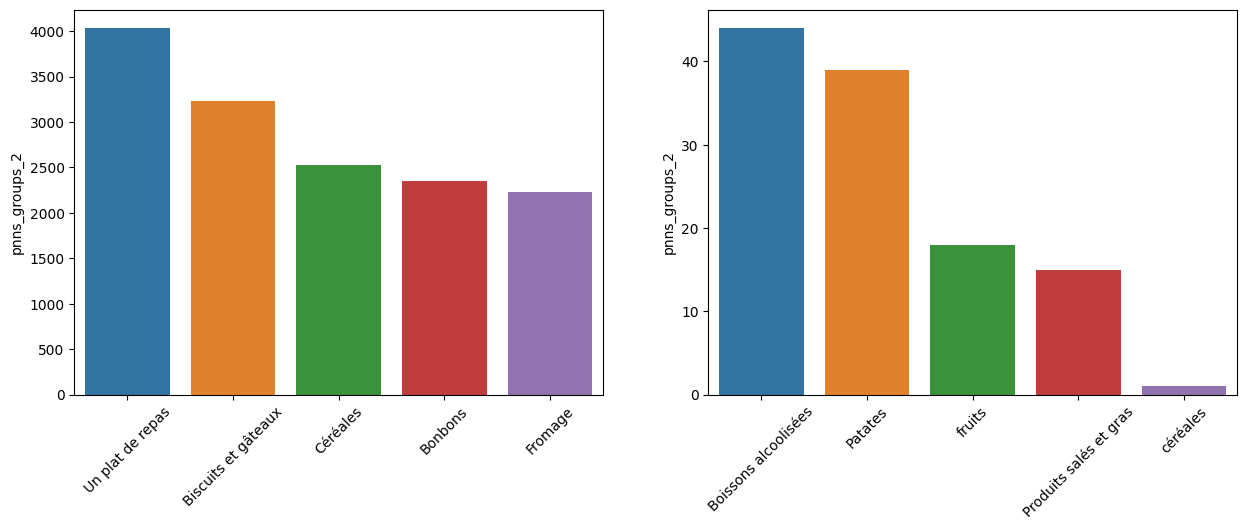

In [75]:
# Nb de produits par catégories:
TopP = DataFinal['pnns_groups_2'].value_counts().to_frame().reset_index()

fig, ax = plt.subplots(ncols = 2, figsize = (15,5))

plt.subplot(121)
ax1 = sns.barplot(TopP.head(5), x = 'index', y= 'pnns_groups_2')
plt.xticks(rotation = 45)
plt.xlabel('')

plt.subplot(122)
ax2 = sns.barplot(TopP.tail(5), x = 'index', y= 'pnns_groups_2')
plt.xticks(rotation = 45)
plt.xlabel("")

plt.show()

- **Les produits les plus présents sont les plats tout fait, les biscuits et les céréales.**
- **Il y a 1 céréale avec une autre orthographe.**

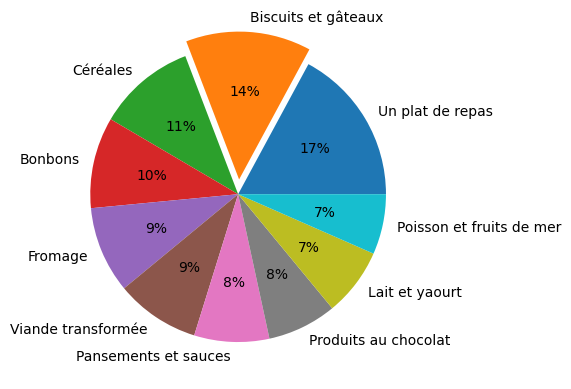

In [76]:
# Sous forme de tarte :
explode = [0, 0.1, 0, 0, 0, 0,0,0,0,0]
plt.pie(TopP['pnns_groups_2'].head(10), labels = TopP['index'].head(10),
        explode=explode, autopct='%.0f%%')
plt.show()

- **Pour avoir une part de tarte dans la catégorie Gateaux...**

In [77]:
#Modification des noms de groupes:
print(DataFinal['pnns_groups_2'].nunique())
print(DataFinal['pnns_groups_2'].unique())
DataFinal['pnns_groups_2'] = DataFinal['pnns_groups_2'].str.capitalize()
print(DataFinal['pnns_groups_2'].nunique())
print(DataFinal['pnns_groups_2'].unique())

39
['Fruits' 'légumes' 'Œufs' 'Céréales' 'Légumes' 'Légumineuses'
 'Un plat de repas' 'Viande' 'Lait et yaourt' 'Céréales du petit-déjeuner'
 'Pain' 'Pansements et sauces' 'Poisson et fruits de mer' 'Fromage'
 'Soupes' 'Produits au chocolat' 'Boissons non sucrées' 'Boissons sucrées'
 'Apéritifs' 'Fruits secs' 'Sandwich' 'fruits' 'Des noisettes' 'Patates'
 'Desserts laitiers' 'Bonbons' 'Biscuits et gâteaux' 'Pizzas et quiche'
 'Glace' 'céréales' 'Graisses' 'Viande transformée' 'Plats de tripes'
 'Jus de fruits' 'Boissons sucrées artificiellement' 'des pâtisseries'
 'Boissons alcoolisées' 'Nectars des fruits' 'Produits salés et gras']
36
['Fruits' 'Légumes' 'Œufs' 'Céréales' 'Légumineuses' 'Un plat de repas'
 'Viande' 'Lait et yaourt' 'Céréales du petit-déjeuner' 'Pain'
 'Pansements et sauces' 'Poisson et fruits de mer' 'Fromage' 'Soupes'
 'Produits au chocolat' 'Boissons non sucrées' 'Boissons sucrées'
 'Apéritifs' 'Fruits secs' 'Sandwich' 'Des noisettes' 'Patates'
 'Desserts laitiers' 

- **Il y avait donc 3 catégories mal sans majuscule (céréale, légumes et fruits).**

In [78]:
# Remplissage des colonnes text:
CollObject = DataFinal.select_dtypes('object')
DataFinal[CollObject.columns] = CollObject.fillna("Non Communiqué")

In [79]:
# Suppression des colonnes vides :
DataFinal = DataFinal.dropna(axis = 1, how = 'all')
DataFinal.shape

(40003, 91)

- **Il reste a ce stade 40000 produits et 91 colonnes.**

In [80]:
# Ajout de l'étape
Etape9 = ['Etape 9', 'Remplissage des Colonnes Textes + Suppression des produits sans groupes PNNS2', DataFinal.shape[1], DataFinal.shape[0], round((DataFinal.isna().sum().sum())*100/(DataFinal.shape[0]*DataFinal.shape[1]))]
Etape9 = pd.DataFrame([Etape9], columns = ['Etapes', 'Action', 'NbColonne', 'NbLigne', 'PourcentageNaN'])
DfNettoyage = pd.concat([DfNettoyage, Etape9])

## 4.3 :  Création du EnvironnementScore/grade
- **Pour chacun des 6 paramétres on retrouve:**
    - 1 : Trés Bon
    - 0.3 : Non Communiqué
    - 0 : Trés Mauvais 
    
**Selon le magazine 60 millions de consommateurs de juin/juillet 2020[10], une étude australienne parue en janvier 2019 montrait que la consommation d’aliments ultratransformés contribuait à plus d’un tiers des effets environnementaux liés à l’alimentation. En France, l’empreinte carbone des produits alimentaires industriels est d’environ 9,1 millions de tonnes de CO2, hors transport. Les produits qui ont des facteurs de consommation d’énergie et d’émissions les plus élevés sont les pommes de terre transformées (purée, chips, frites, …), les boissons alcoolisées distillées, les plats préparés et le sucre.**

In [81]:
# Création d'un score pour les additifs (en fonction de leur quantité):
def Additifs(value):
    if value <= 3 :
        return 1
    if value > 3 and value <= 10:
        return 0.1
    if value > 10:
        return 0
    else:
        return 0.3


DataFinal['NbAdditifs'] = DataFinal['additives_n'].apply(Additifs)

In [82]:
# Création d'une colonne Huile de Palme (1 pas d'huile de Palme, 0 pour non communiqué et -1 ou -2 si présence.)
DataFinal['HuileDePalme'] = DataFinal['ingredients_from_palm_oil_n'] + DataFinal['ingredients_that_may_be_from_palm_oil_n']
del DataFinal['ingredients_from_palm_oil_n']
del DataFinal['ingredients_that_may_be_from_palm_oil_n']

def Palmeisin(value):
    if value == 0:
        return 1
    if value > 0 and value <3:
        return 0.1
    if value >= 3:
        return 0
    else:
        return 0.3

DataFinal['HuileDePalme'] = DataFinal['HuileDePalme'].apply(Palmeisin)

In [83]:
# Transformation de la colonne labels en labelBio (1 pour Bio, 0 pour non Bio):
def bio(value):
    if 'Bio' in value:
        return 1
    else:
        return 0
DataFinal['labels_fr'] = DataFinal['labels_fr'].apply(bio)
DataFinal.rename(columns = {'labels_fr':'LabelsBio'}, inplace = True)

In [84]:
# Transformation de la colonne Packaging (-1 pour le plastique, 0 pour non communiqué et 1 pour le reste):
def plastique(value):
    if 'plastique' in value.lower():
        return 0
    elif value == 'Non Communiqué':
        return 0.3
    else:
        return 1

DataFinal['Packaging'] = DataFinal['packaging_tags'].apply(plastique)

In [85]:
# Modification des colonnes Production/OriginesIngrédients (1 pour la france, 0 si on ne sait pas et -1 si c'est à l'étrangé)
def prod(value):
    if 'france' in value or 'Français' in value or 'francais' in value:
        return 1
    elif value == 'Non Communiqué':
        return 0.3
    else:
        return 0
    
DataFinal['Production'] = DataFinal['manufacturing_places_tags'].apply(prod)
DataFinal['OriginesIngredients'] = DataFinal['origins_tags'].apply(prod)

## 4.4 :  Quelles sont les variables utilisées pour la création du Nutriscore
- **But** : diminuer le nombre de variable
- Sachant que l'on veut garder les colonnes les plus pertinantes pour l'établissement du nutriscore via ces variables.
- D'aprés internet les colonnes les plus pertinantes sont les teneurs pour 100g ou 100ml:
    - d’acides gras saturés
    - de sucres
    - de sel (aussi appelé sodium dans certaines préparations)
    - de protéines
    - de fibres

In [86]:
# Pourcentage de remplissage des variables restantes :
VariablesQuant = DataFinal.select_dtypes(exclude=('object'))
VariablesQuant = pd.DataFrame((VariablesQuant.notna().mean()*100).round(2).sort_values(ascending = False).head(20))
VariablesQuant = VariablesQuant[VariablesQuant[0] > 60]
VariablesQuant

,0
LabelsBio,100.00
NGf,100.00
Production,100.00
Packaging,100.00
HuileDePalme,100.00
NbAdditifs,100.00
OriginesIngredients,100.00
energy_100g,99.96
saturated-fat_100g,99.96
sodium_100g,99.96


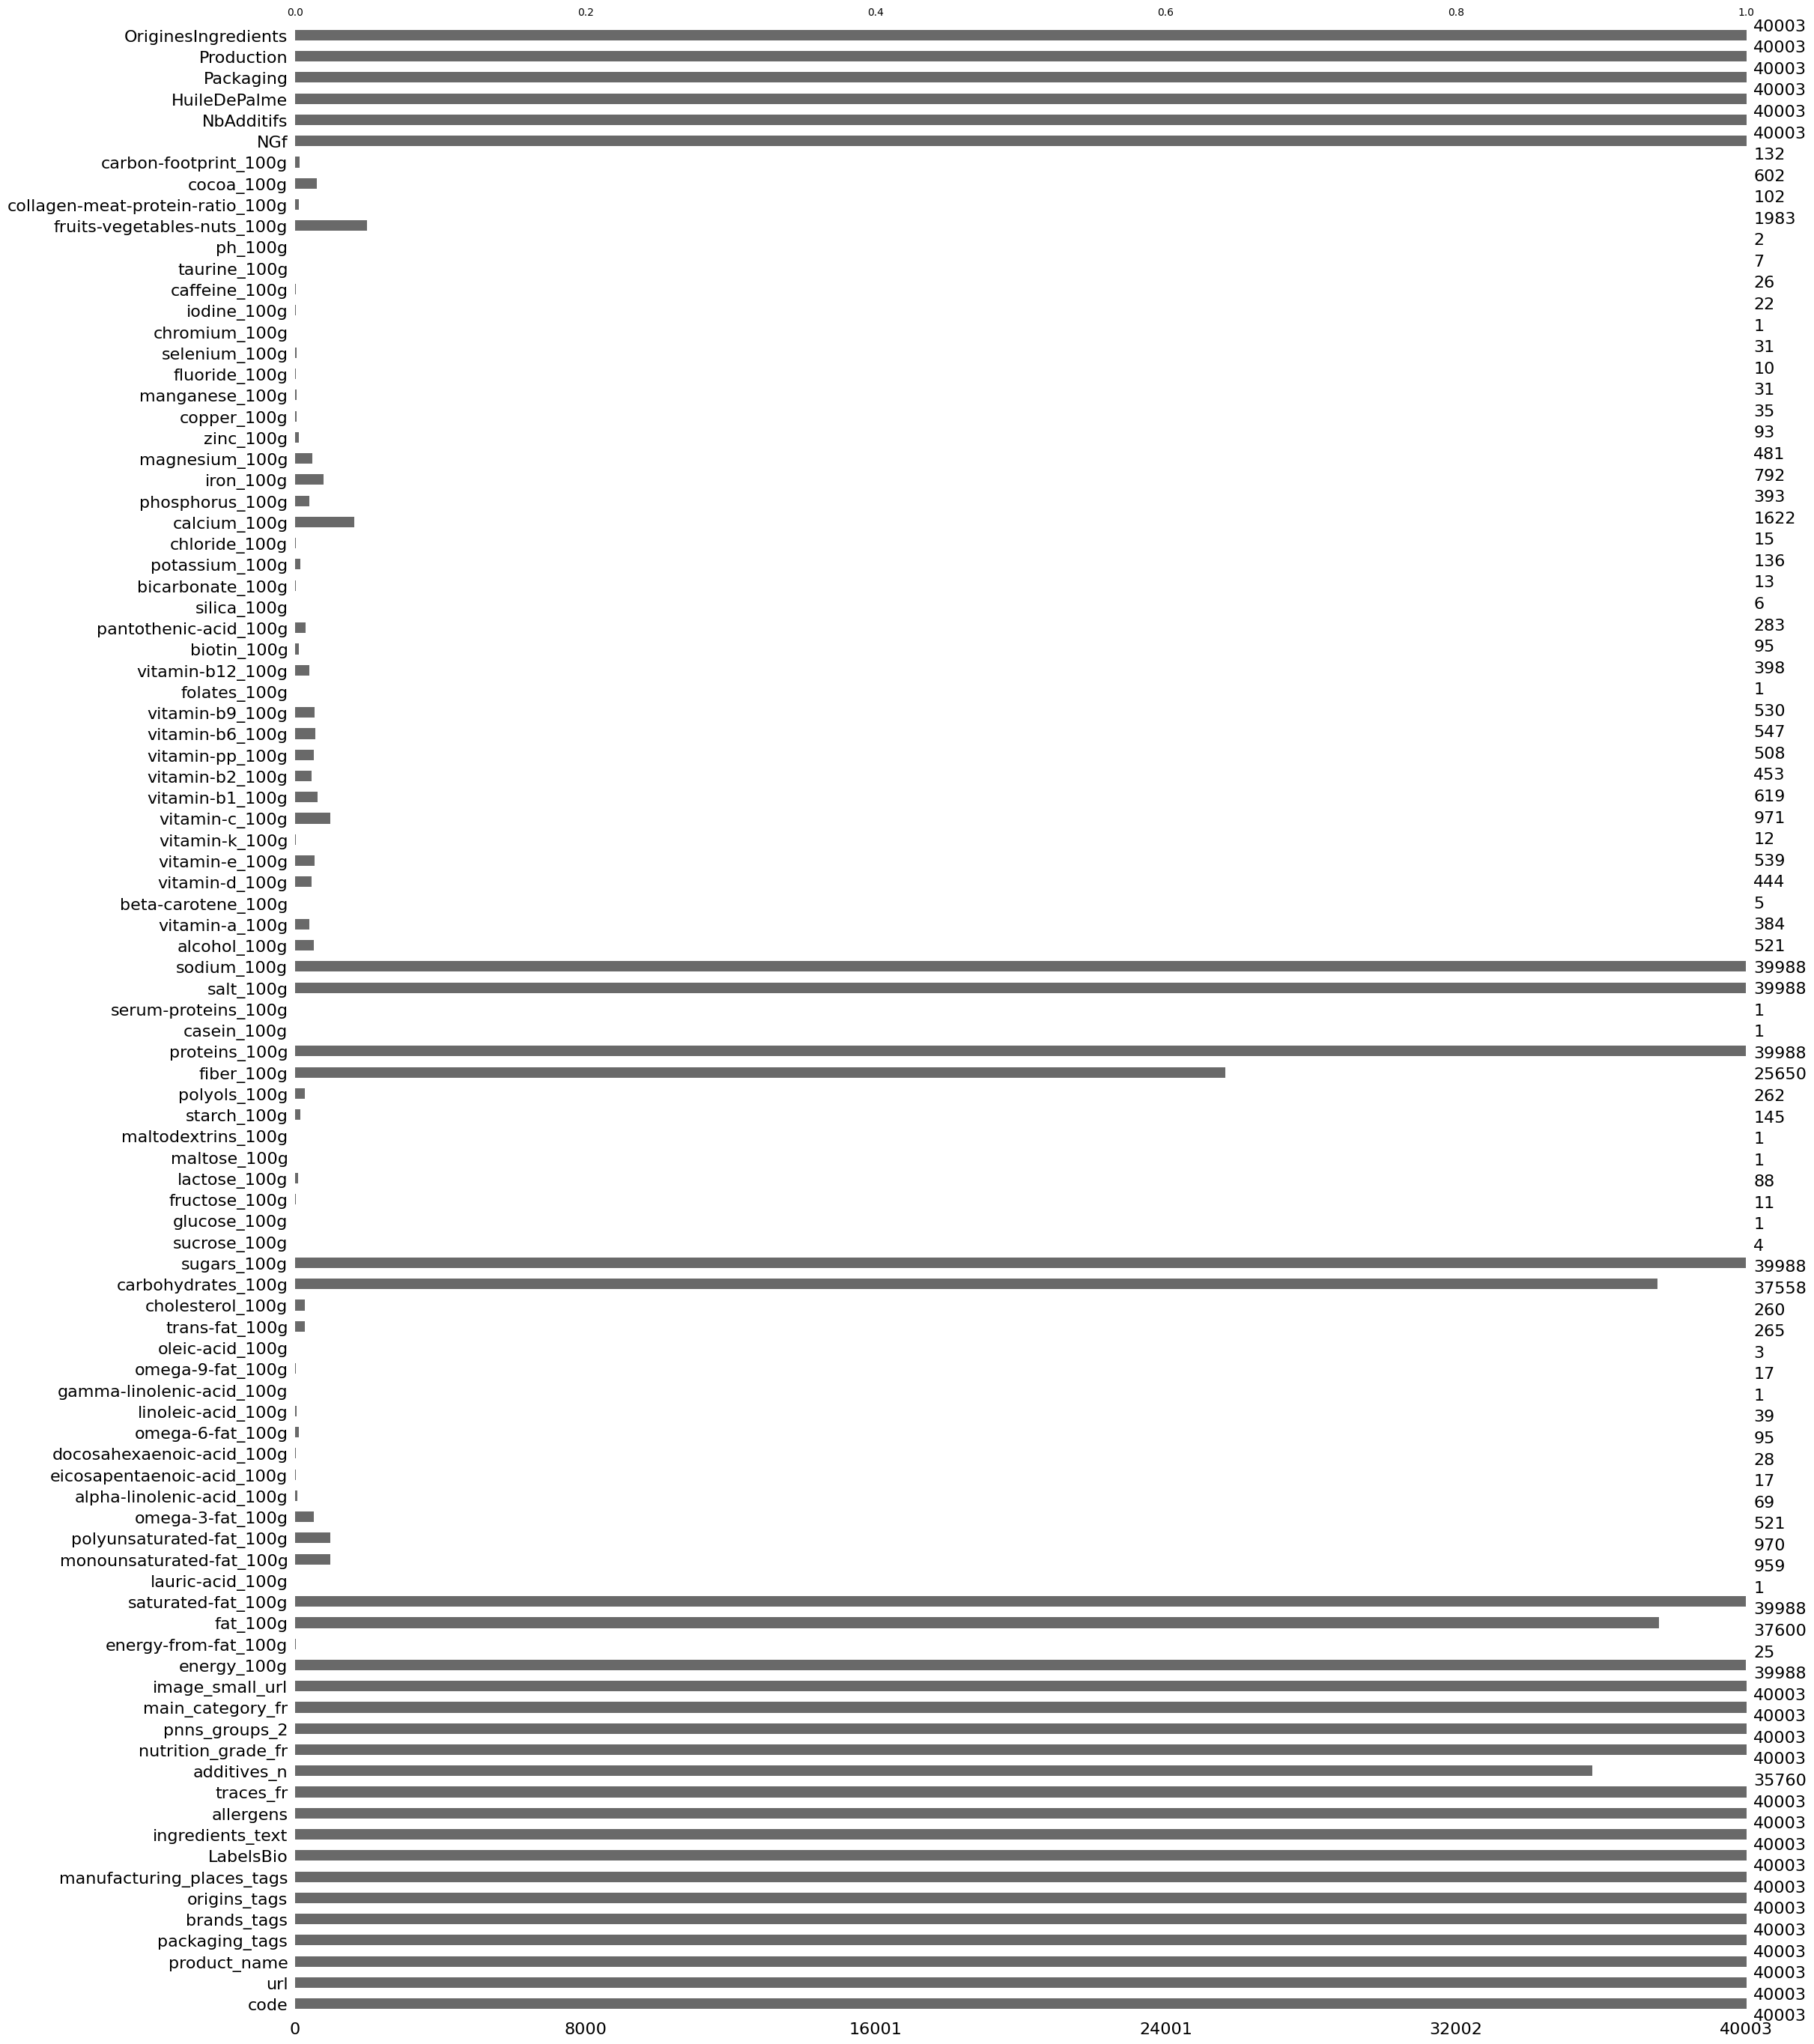

In [87]:
msno.bar(DataFinal)
plt.show()

- **Au vu du taux de remplissage au final les 5 composantes du nutriscore sont présentes dans les plus de 64% de remplissage.**
- **Je vais donc garder les colonnes au dessus de 60% de remplissage quitte à éliminer ensuite les autres colonnes en trop.**

In [88]:
# Elimination des colonnes en trop:
DataFinal = DataFinal[['code', 'url', 'product_name', 'brands_tags', 
       'ingredients_text', 'allergens', 'traces_fr', 'nutrition_grade_fr', 'pnns_groups_2', 'main_category_fr',
       'image_small_url', 'NGf', 'saturated-fat_100g', 'energy_100g', 'sodium_100g',
       'salt_100g', 'proteins_100g', 'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g', 
        'OriginesIngredients','Production','LabelsBio','HuileDePalme','Packaging','NbAdditifs']]

In [89]:
# Ajout de l'étape
Etape10 = ['Etape 10',"Création des variables pour l'EnvironnementScore + Recentrage sur les variables utiles au Nutriscore", DataFinal.shape[1], DataFinal.shape[0], round((DataFinal.isna().sum().sum())*100/(DataFinal.shape[0]*DataFinal.shape[1]))]
Etape10 = pd.DataFrame([Etape10], columns = ['Etapes', 'Action', 'NbColonne', 'NbLigne', 'PourcentageNaN'])
DfNettoyage = pd.concat([DfNettoyage, Etape10])

## 4.5 : Remplissage des colonnes nutritifs

In [90]:
# Remplassement des NaNs par la médiane de chaque groupe nutritif: (c'est plus long mais plus précis)

Ingredients = ['saturated-fat_100g', 'energy_100g', 'sodium_100g', 'salt_100g', 'proteins_100g', 'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g']
#Mediane = DataFinal.groupby('pnns_groups_2').median()

#for row in tqdm(range(0,len(DataFinal))):
    #DataValue = DataFinal.iloc[row:row+1,14:]
    #NomCat = DataFinal.iloc[row:row+1]['pnns_groups_2'].values[0]
    #for colonne in Ingredients:    
        #med = Mediane.loc[NomCat][colonne]
        #DataFinal.iloc[row:row+1] = DataFinal.iloc[row:row+1].fillna(med)'''

In [91]:
# remplissage des NaNs par 0 en supposant que les valeurs manquantes ne sont justes pas référencées pour chacun des produits.
DataFinal[Ingredients] = DataFinal[Ingredients].fillna(0)

In [92]:
# Remplasser les données par les plus proches voisins :
from sklearn.impute import KNNImputer
#DataFinal[Ingredients] = KNNImputer(missing_values=np.nan, n_neighbors=5).fit_transform(DataFinal[Ingredients])

In [93]:
# Ajout de l'étape
Etape11 = ['Etape 11', "Remplissage des colonnes quantitatives par 0", DataFinal.shape[1], DataFinal.shape[0], round((DataFinal.isna().sum().sum())*100/(DataFinal.shape[0]*DataFinal.shape[1]))]
Etape11 = pd.DataFrame([Etape11], columns = ['Etapes', 'Action', 'NbColonne', 'NbLigne', 'PourcentageNaN'])
DfNettoyage = pd.concat([DfNettoyage, Etape11])

In [94]:
DfNettoyage

,Etapes,Action,NbColonne,NbLigne,PourcentageNaN
0,Etape 1,Ouverture du Fichier,162,320772,76
0,Etape 2,Suppression des colonnes vides,146,320772,74
0,Etape 3,Suppression des lignes vides,146,265302,71
0,Etape 4,Etude des Variables Info Générales,139,261822,74
0,Etape 5,Etude des Variables Tags + Centrage sur produi...,121,66822,75
0,Etape 6,Etude des Variables Ingrédients,118,66822,75
0,Etape 7,Etude des Variables Données Diverses,106,66822,79
0,Etape 8,Etude des Variables Données Nutritives,97,66820,78
0,Etape 9,Remplissage des Colonnes Textes + Suppression ...,91,40003,70
0,Etape 10,Création des variables pour l'EnvironnementSco...,27,40003,2


## 4.6 : Exportation des fichiers

In [95]:
#Exporter les fichiers : 
DataFinal.to_csv('DataFinal.csv', index=False)
DfNettoyage.to_csv('DfNettoyage.csv', index=False)